In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [2]:
tf.__version__

'2.17.0'

-1.7520130864483148 2.6990838634517145


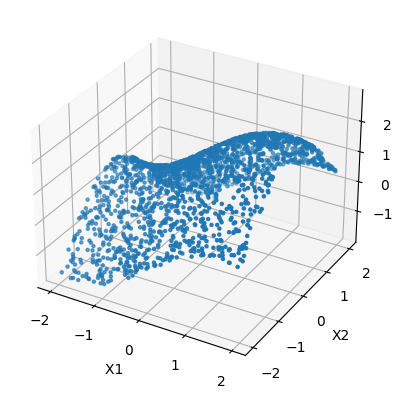

In [3]:
x = np.random.random((2000,2))*4 - 2.0
y = np.sin(x[:,0])*1.1 + np.cos(x[:,1])*1.6
print(np.min(y), np.max(y))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker=".")
ax.set_xlabel('X1 ')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.ion()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86 (344.00 B)

 Trainable params: 86 (344.00 B)

 Non-trainable params: 0 (0.00 B)

<Axes: >

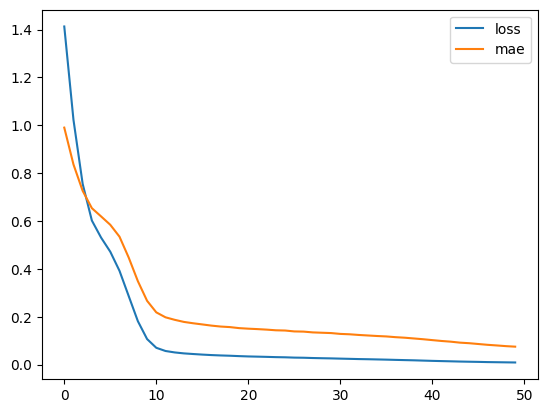

In [4]:
def create_model():
    m = Sequential()
    m.add(Dense(5, activation='relu', input_shape=(2,)))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(1))

    m.compile(loss="mse", optimizer="adam", metrics=["mae"])
    m.summary()
    return m

model_1 = create_model()
hist = model_1.fit(x,y, epochs=50, batch_size=32, verbose=0)
df1 = pd.DataFrame(hist.history)
df1.plot()

In [5]:
df1.tail(5)

,loss,mae
45,0.011259,0.085955
46,0.010387,0.082597
47,0.009857,0.079953
48,0.009315,0.077075
49,0.008775,0.074878


## Let's Fit a plynomial and see how it behaves outside the range

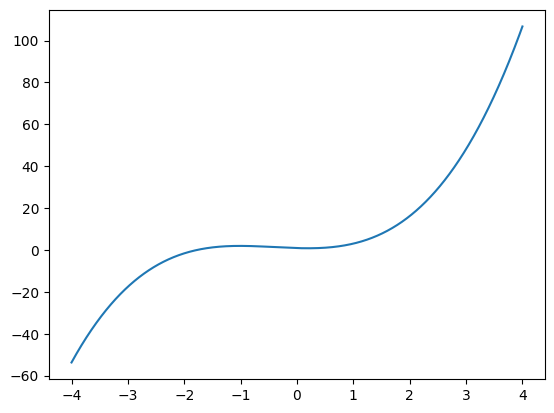

In [6]:
def poly(x):
    a,b,c,d = 1.3, 1.6, -0.75, 0.9
    return a*(x**3) + b*(x**2) + c*x + d

x = np.linspace(-4.0,4.0,2000)
y = poly(x)
_= plt.plot(x,y)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

<Axes: >

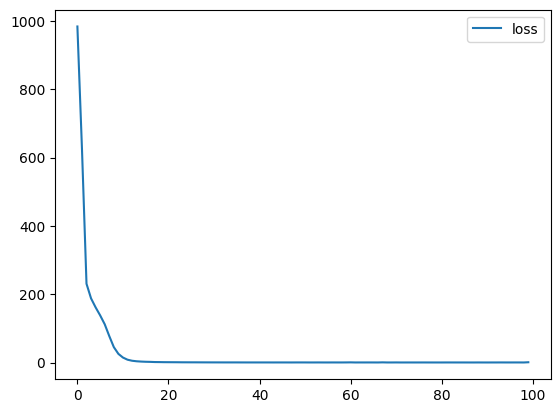

In [7]:
def create_model():
    tf.keras.backend.clear_session()
    m = Sequential()
    m.add(Dense(10, activation='relu', input_shape=(1,)))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(10, activation='relu'))
    m.add(Dense(1))

    m.compile(loss="mse", optimizer="adam")
    m.summary()
    return m

model_2 = create_model()
hist = model_2.fit(x,y, epochs=100, batch_size=32, verbose=0)
df2 = pd.DataFrame(hist.history)
df2.plot()

In [8]:
df2.tail(5)

,loss
95,0.138140
96,0.175717
97,0.173032
98,0.088095
99,0.763477


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


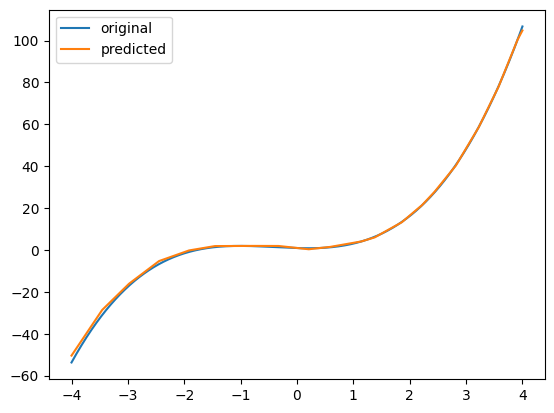

In [9]:
y_pred = model_2.predict(x).flatten()
_= plt.plot(x,y, label="original")
_= plt.plot(x,y_pred, label="predicted")
plt.legend()

### let's try beyond the range of training set

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


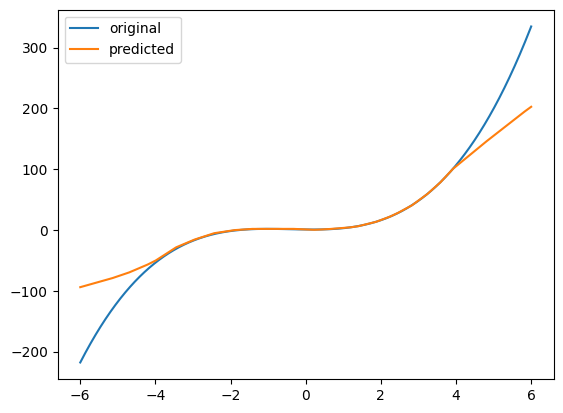

In [10]:
x_ext = np.linspace(-6,6,3000)
y_or_ext = poly(x_ext)
y_pred_ext = model_2.predict(x_ext).flatten()
plt.plot(x_ext, y_or_ext, label="original")
plt.plot(x_ext, y_pred_ext, label="predicted")
plt.legend()

## Let's try a complex function

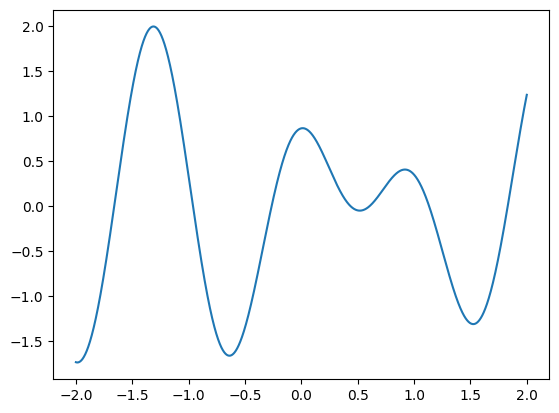

In [21]:
x = np.linspace(-2,2,4000)
y = np.cos(x*5.3 + 0.7)+np.sin(3.7*x + 0.1)
plt.plot(x,y)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=2024)

In [46]:
def create_deep_model(layers):
    tf.keras.backend.clear_session()
    m = Sequential()
    m.add(Input(shape=(1,)))
    for l in layers:
        m.add(Dense(l, activation='relu'))
    m.add(Dense(1))

    m.compile(loss="mse", optimizer="adam")
    m.summary()
    return m

model_3 = create_deep_model([8,8,8,8])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

<Axes: >

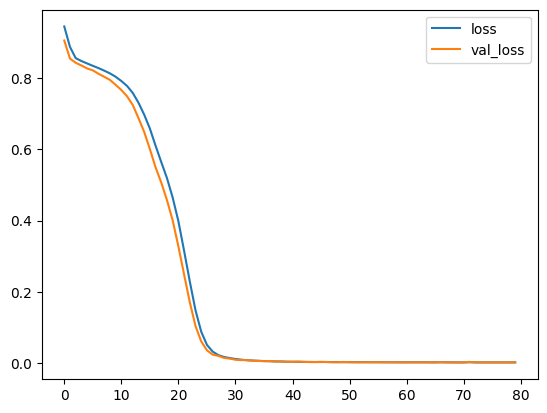

In [47]:
hist = model_3.fit(x_train,y_train, epochs=80, batch_size=32, validation_data=(x_test,y_test), verbose=0)
df2 = pd.DataFrame(hist.history)
df2.plot()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


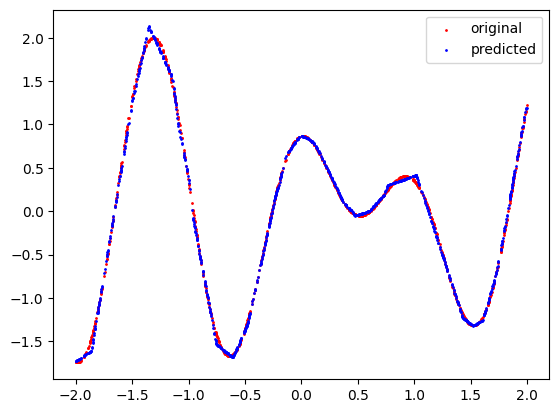

In [48]:
y_pred = model_3.predict(x_test).flatten()
_= plt.scatter(x_test,y_test, label="original", s=1, c="red")
_= plt.scatter(x_test,y_pred, label="predicted", s=1, c="blue")
plt.legend()